In [11]:
import explore as e
import matplotlib.pyplot as plt
import pandas as pd
import env
import os
import seaborn as sns
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")

import acquire as a

In [12]:
df = a.sql_query_zillow() # Acquiring Zillow data

In [13]:
df.columns

Index(['Unnamed: 0', 'propertylandusetypeid', 'id', 'parcelid',
       'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
       'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertyzoningdesc',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid',
       'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt',
       'yardbu

In [14]:
df=df[['bathroomcnt', 
       'bedroomcnt', 
       'taxvaluedollarcnt', 
       'taxamount',
       'fips']]

In [15]:
df.head()

,bathroomcnt,bedroomcnt,taxvaluedollarcnt,taxamount,fips
0,0.0,0.0,27516.0,NaN,6037.0
1,0.0,0.0,10.0,NaN,6037.0
2,0.0,0.0,10.0,NaN,6037.0
3,0.0,0.0,2108.0,174.21,6037.0
4,2.0,4.0,296425.0,6941.39,6037.0


# Cleaning Data

In [16]:
df.isna().sum() #null total

bathroomcnt            11
bedroomcnt             11
taxvaluedollarcnt     493
taxamount            4442
fips                    0
dtype: int64

In [17]:
def upper_outlier_detector(dataframe, copy, column, k=1.5):
    '''remove outliers'''
    q1 = np.percentile(copy, 25,interpolation="midpoint")
    q3 = np.percentile(copy, 75,interpolation="midpoint")

    iqr = q3 - q1

    upper = q3 + k * iqr
    lower = q1 - k * iqr

    upper_index = np.where(dataframe[column] >= upper)[0]
    lower_index = np.where(dataframe[column] <= lower)[0]

    dataframe.drop(upper_index,inplace=True)
    dataframe.drop(lower_index,inplace=True)

    dataframe.reset_index(inplace=True)
    return dataframe

In [18]:
def remove_null(df):
    '''
    Remove the nulls in DataFrame
    '''
    df['bathroomcnt'] = df.bathroomcnt.fillna(value=2.00)
    df.bedroomcnt.fillna(value=3.0, inplace=True)
    df.taxvaluedollarcnt.fillna(value=450000.0, inplace=True)
    df.taxamount.fillna(value=5634.86, inplace=True)
    return df

In [19]:
df = remove_null(df)

<AxesSubplot: xlabel='taxvaluedollarcnt'>

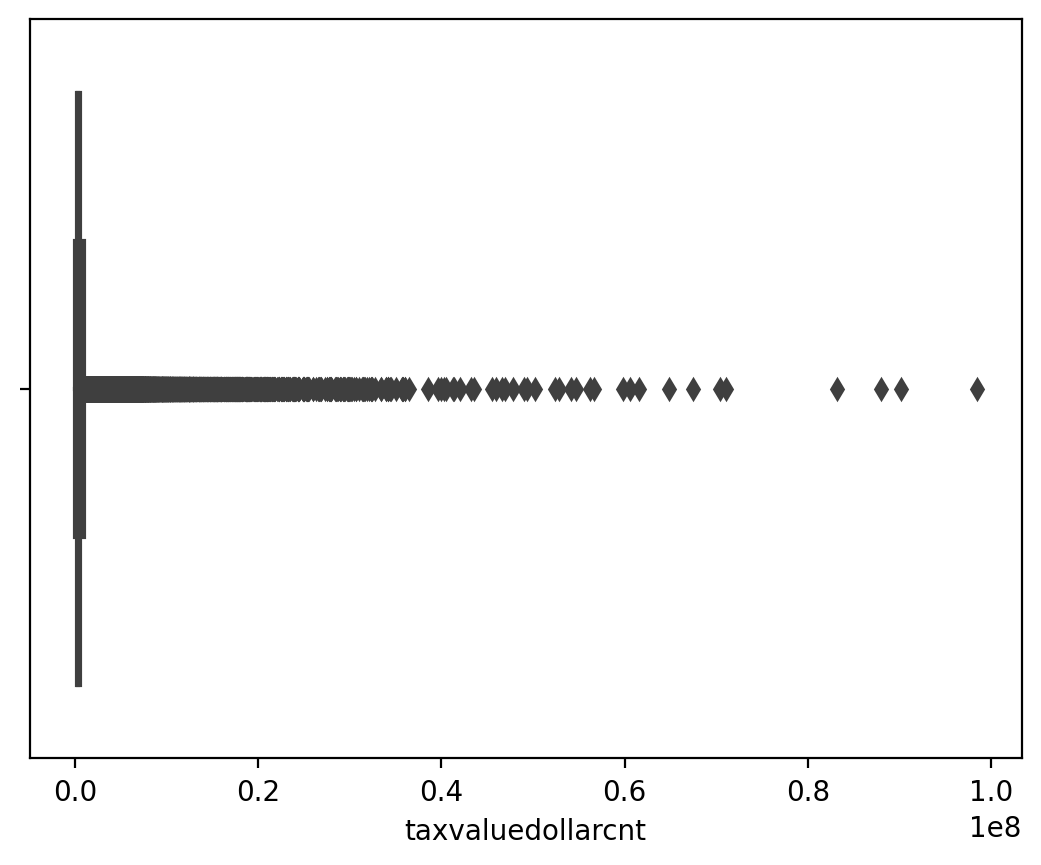

In [20]:
sns.boxplot(df, x='taxvaluedollarcnt')# showing outliers

In [21]:
copy_values=df.taxvaluedollarcnt.values.copy()

In [22]:
upper_outlier_detector(df, copy_values, 'taxvaluedollarcnt', k=1.5)

,index,bathroomcnt,bedroomcnt,taxvaluedollarcnt,taxamount,fips
0,0,0.0,0.0,27516.0,5634.86,6037.0
1,1,0.0,0.0,10.0,5634.86,6037.0
2,2,0.0,0.0,10.0,5634.86,6037.0
3,3,0.0,0.0,2108.0,174.21,6037.0
4,4,2.0,4.0,296425.0,6941.39,6037.0
...,...,...,...,...,...,...
2013846,2152858,3.0,4.0,960756.0,13494.52,6059.0
2013847,2152859,4.5,4.0,536061.0,6244.16,6059.0
2013848,2152860,0.0,0.0,208057.0,5783.88,6059.0
2013849,2152861,2.5,3.0,424353.0,5302.70,6059.0


<AxesSubplot: xlabel='taxvaluedollarcnt'>

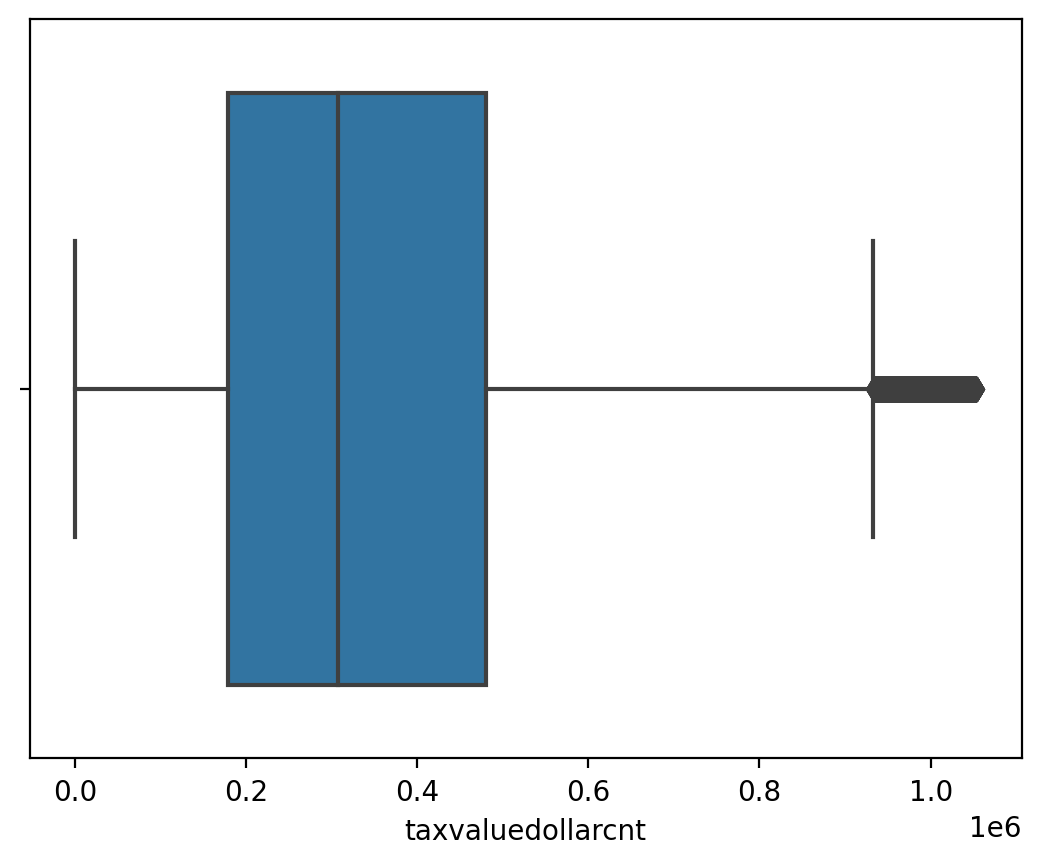

In [23]:
sns.boxplot(df, x='taxvaluedollarcnt') # removing outliers

# Splitting Data 

###### Train Test Set

In [24]:
train_validate, test = train_test_split(df, train_size=.8, random_state=50) # Trainvalidate Test
train, validate= train_test_split(train_validate, train_size=.4, test_size=.3, random_state=50) # Train Validate

In [25]:
train.shape, validate.shape, test.shape # Shape of data splits

((644432, 6), (483324, 6), (402771, 6))

<Figure size 800x600 with 0 Axes>

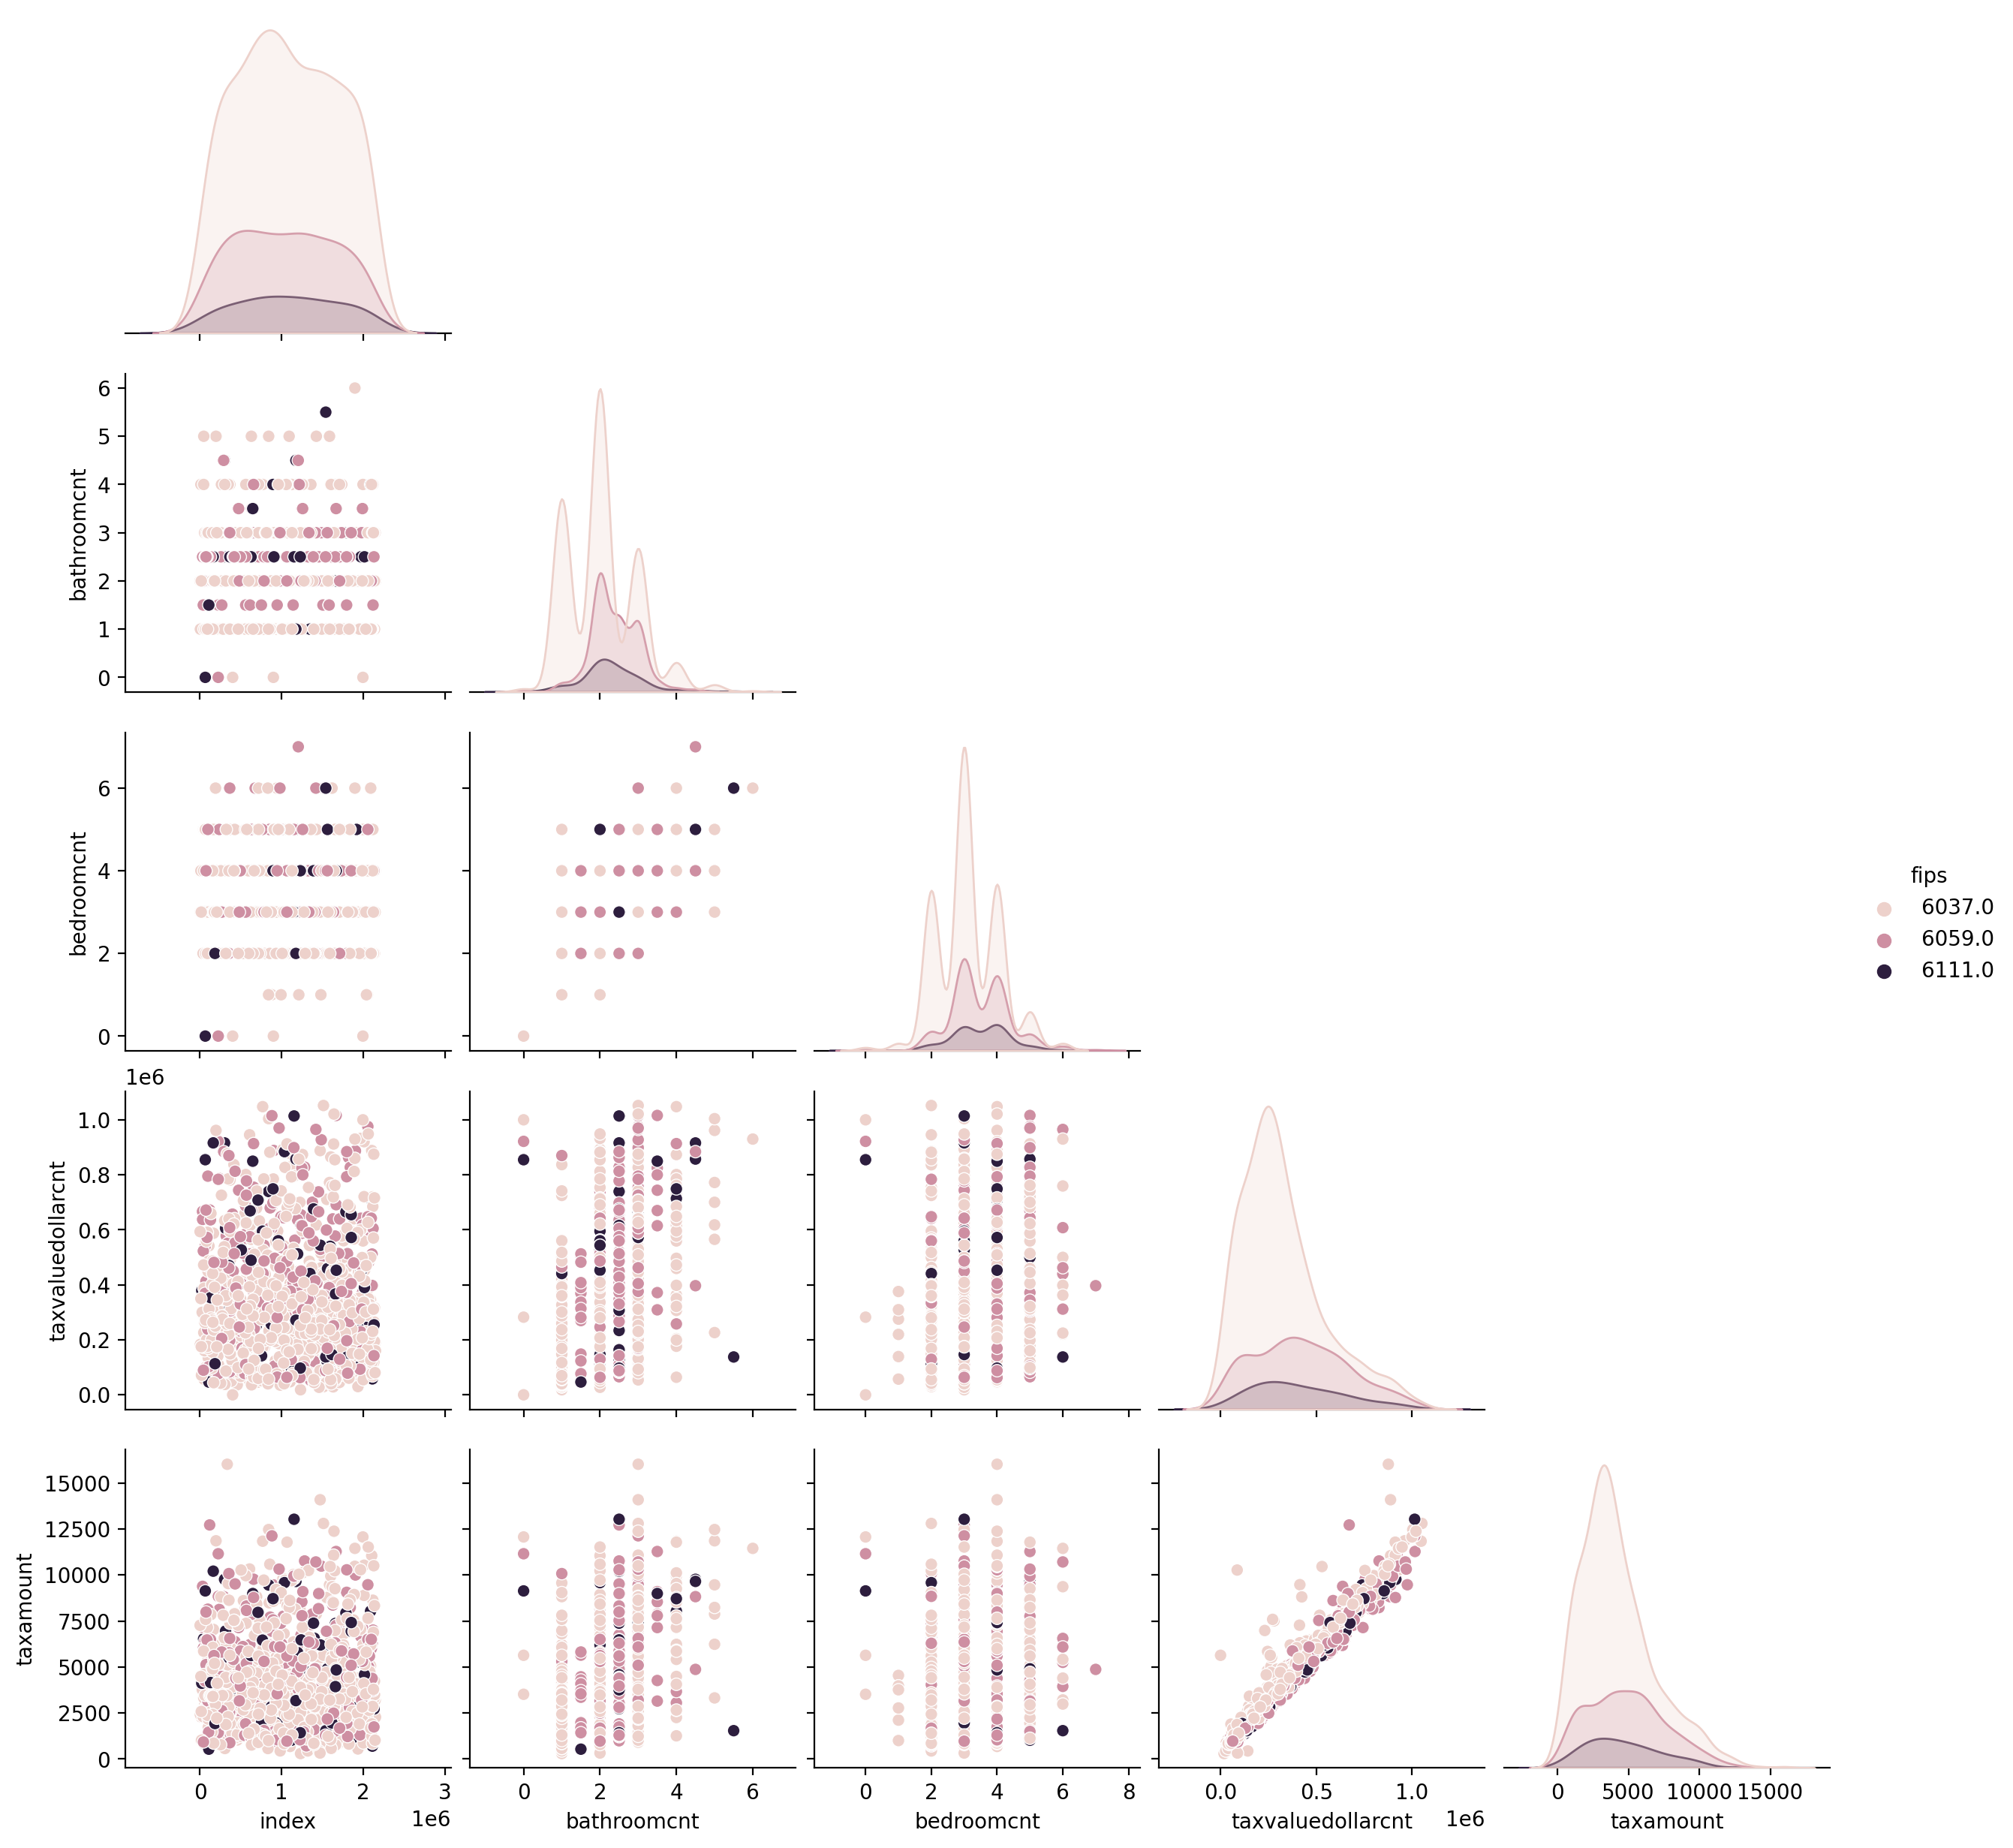

In [26]:
plt.figure(figsize=(8,6))
sns.pairplot(train.sample(1000), hue='fips',corner=True)

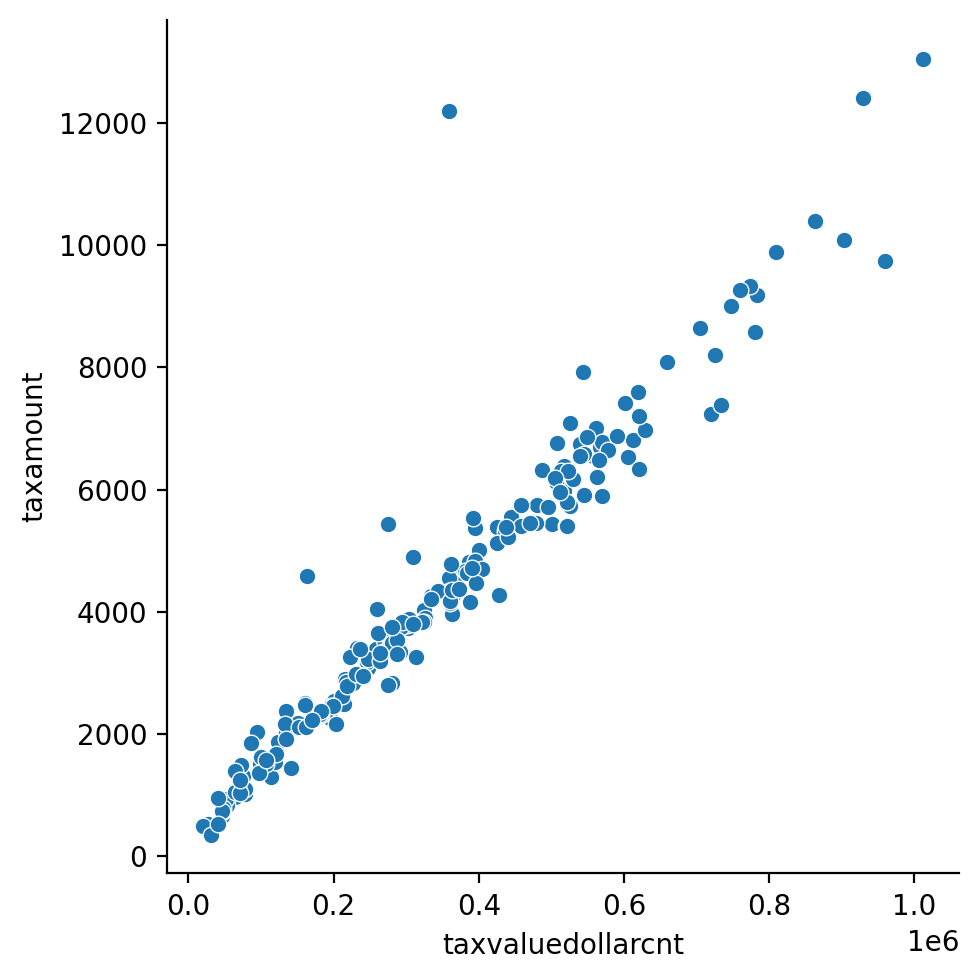

In [27]:
sns.relplot(train.sample(200), x='taxvaluedollarcnt', y='taxamount')

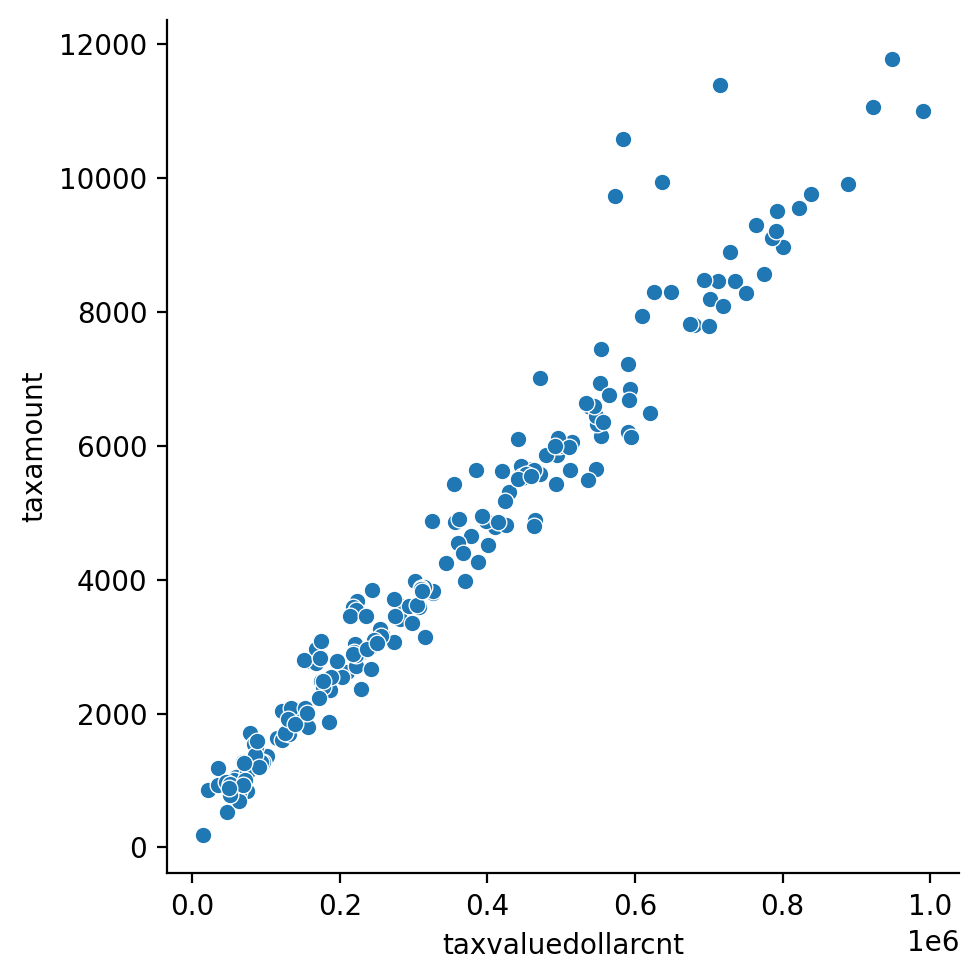

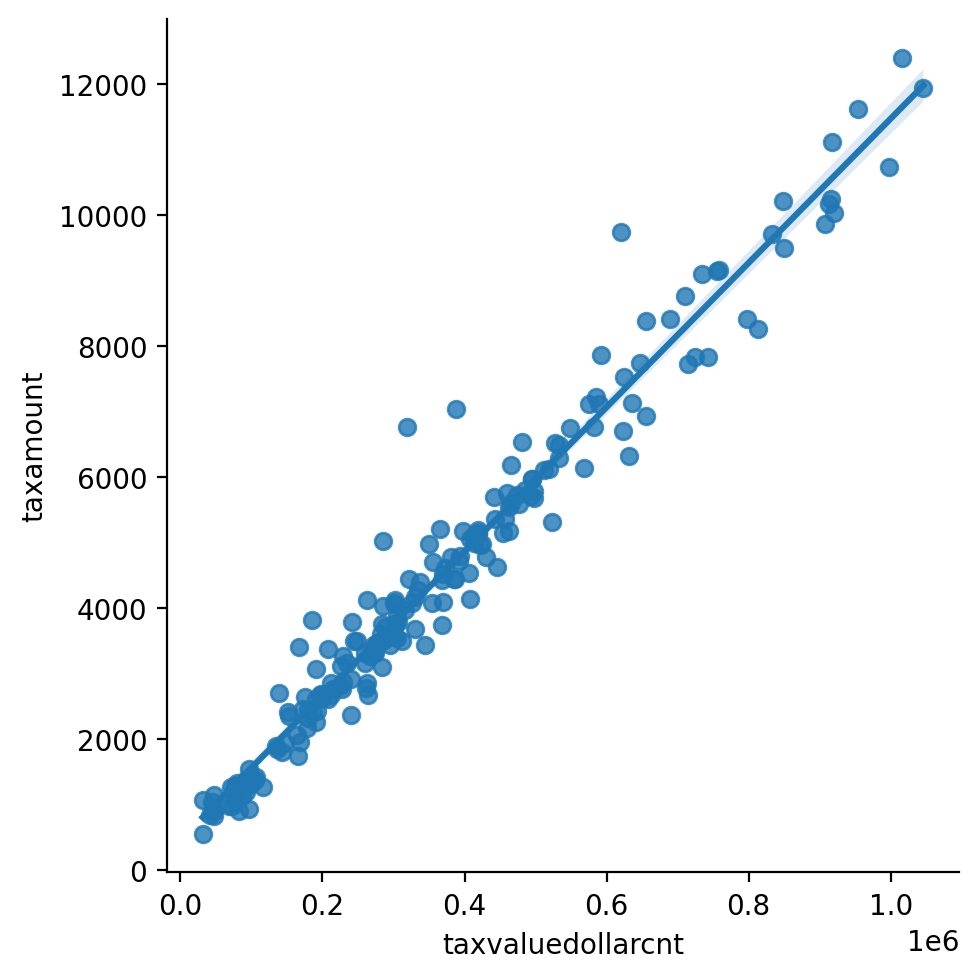

In [44]:
sns.relplot(train.sample(200), x='taxvaluedollarcnt', y='taxamount')
sns.lmplot(data=train.sample(200), x='taxvaluedollarcnt', y='taxamount')

**Takeaways**

Bedrooms, bathrooms, and year are normally distributed.
Taxdollars, taxes, and fibs are NOT normally distributed.